## ***Import Libraries***

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier


## ***ُExplore Dataset***

In [4]:
data = pd.read_csv('HepatitisCdata.csv')

In [5]:
data.shape

(615, 14)

In [6]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## ***Data Cleaning & EDA***

In [7]:
data.drop("Unnamed: 0" , axis = 1 , inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [9]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [10]:
data['Category'] = data['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

data['Sex'] = data['Sex'].map({'m': 1, 'f': 0})

In [11]:
new_cols = {'ALB':'Albumin Blood Test (ALB) g/L ',
            'ALP':  'Alkaline Phosphatase Test (ALP) IU/L',
            'ALT': 'Alanine Transaminase Test (ALT) U/L',
            'AST' : 'Aspartate Transaminase Test (AST) U/L',
            'BIL': 'Bilirubin Blood Test (BIL) µmol/L',
            'CHE' : 'Cholinesterase (CHE) kU/L' ,
            'CHOL' : 'Cholesterol (CHOL) mmol/L',
            'CREA' : 'Creatinine Blod Test (CREA) µmol/L',
            'GGT' : 'Gamma-Glutamyl Transpeptidase Test (GGT) U/L',
            'PROT' : 'Protein Blood Test (PROT) g/L'}

data.rename(columns=new_cols ,inplace=True)
data.head()


,Category,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,0,32,1,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,0,32,1,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,0,32,1,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,0,32,1,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,0,32,1,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [12]:
data.isna().sum()

Category                                         0
Age                                              0
Sex                                              0
Albumin Blood Test (ALB) g/L                     1
Alkaline Phosphatase Test (ALP) IU/L            18
Alanine Transaminase Test (ALT) U/L              1
Aspartate Transaminase Test (AST) U/L            0
Bilirubin Blood Test (BIL) µmol/L                0
Cholinesterase (CHE) kU/L                        0
Cholesterol (CHOL) mmol/L                       10
Creatinine Blod Test (CREA) µmol/L               0
Gamma-Glutamyl Transpeptidase Test (GGT) U/L     0
Protein Blood Test (PROT) g/L                    1
dtype: int64

In [13]:
data.fillna(data.median() ,inplace=True)

In [14]:
data.isna().sum()

Category                                        0
Age                                             0
Sex                                             0
Albumin Blood Test (ALB) g/L                    0
Alkaline Phosphatase Test (ALP) IU/L            0
Alanine Transaminase Test (ALT) U/L             0
Aspartate Transaminase Test (AST) U/L           0
Bilirubin Blood Test (BIL) µmol/L               0
Cholinesterase (CHE) kU/L                       0
Cholesterol (CHOL) mmol/L                       0
Creatinine Blod Test (CREA) µmol/L              0
Gamma-Glutamyl Transpeptidase Test (GGT) U/L    0
Protein Blood Test (PROT) g/L                   0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Category                                      615 non-null    int64  
 1   Age                                           615 non-null    int64  
 2   Sex                                           615 non-null    int64  
 3   Albumin Blood Test (ALB) g/L                  615 non-null    float64
 4   Alkaline Phosphatase Test (ALP) IU/L          615 non-null    float64
 5   Alanine Transaminase Test (ALT) U/L           615 non-null    float64
 6   Aspartate Transaminase Test (AST) U/L         615 non-null    float64
 7   Bilirubin Blood Test (BIL) µmol/L             615 non-null    float64
 8   Cholinesterase (CHE) kU/L                     615 non-null    float64
 9   Cholesterol (CHOL) mmol/L                     615 non-null    flo

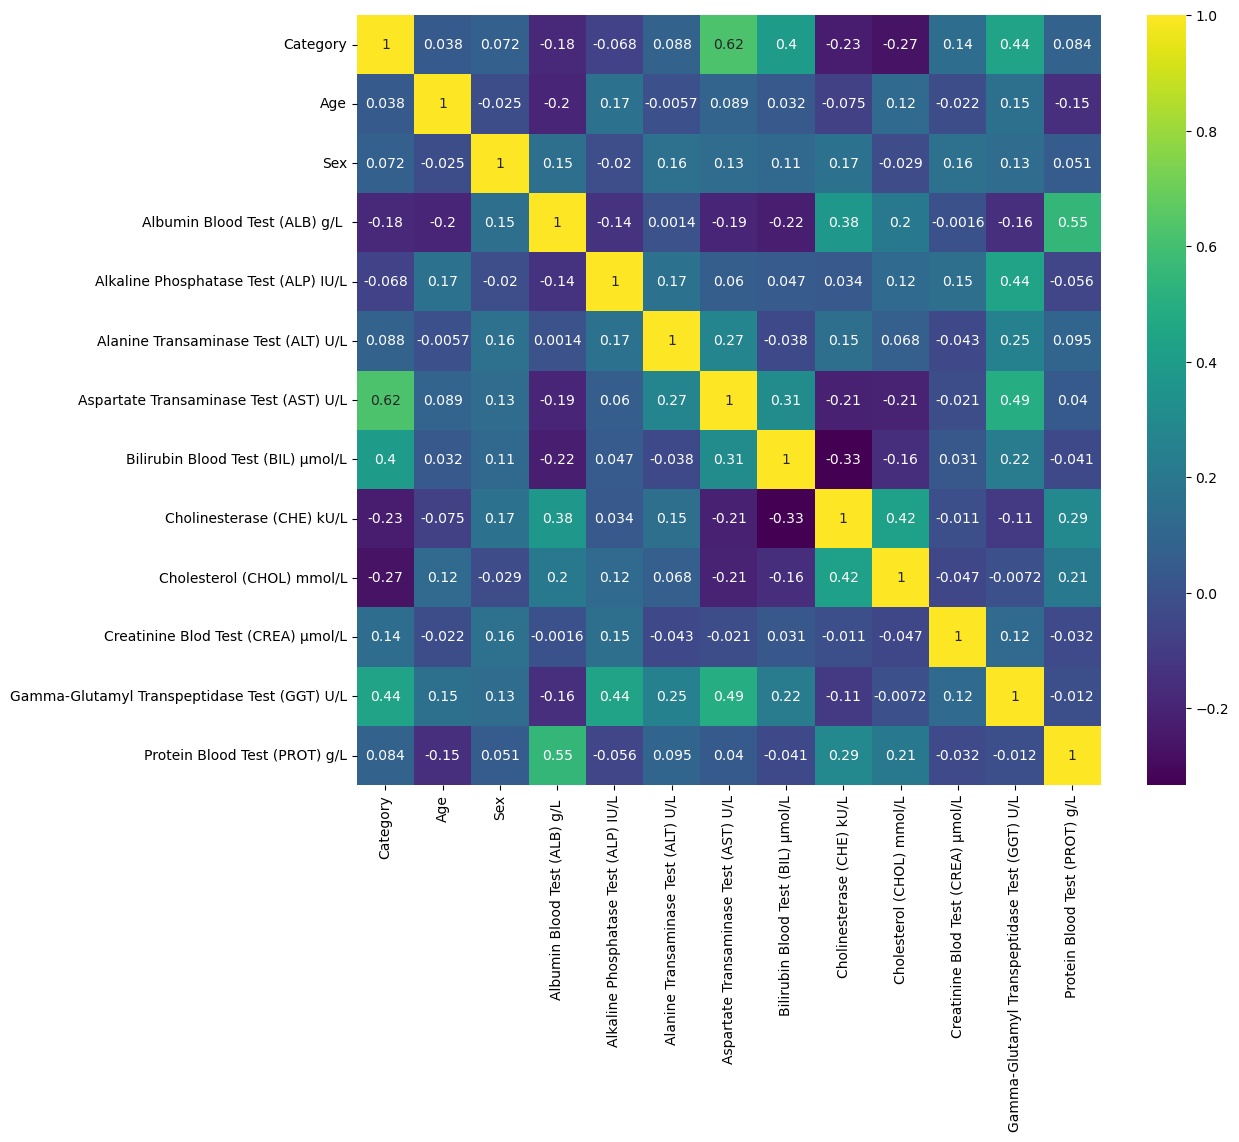

In [16]:
corr = data.corr()
fig , ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr , annot=True , cmap='viridis')
plt.show()

In [17]:
print(f'Total of Healthy People : {data.Category.value_counts()[0]}')
print(f'Total of Infected People : {data.Category.value_counts()[1]}')


Total of Healthy People : 540
Total of Infected People : 75


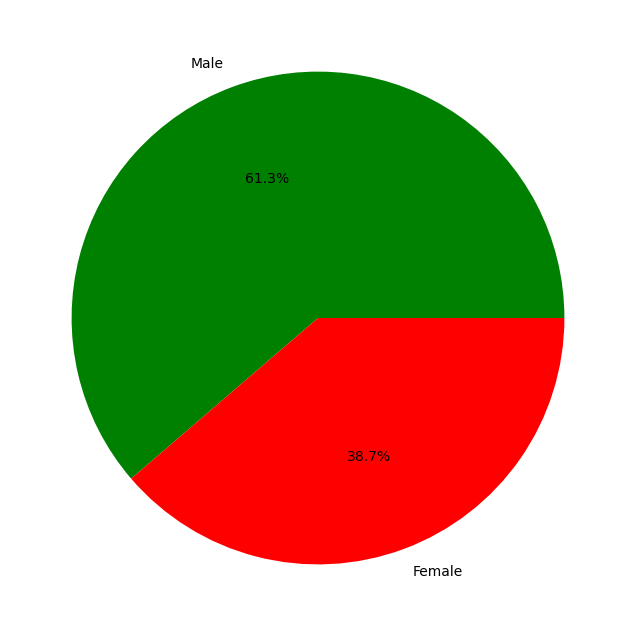

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=data["Sex"].value_counts(), 
        colors=["green","red"], 
        labels=["Male","Female"], 
        autopct= '%1.1f%%',
        )
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


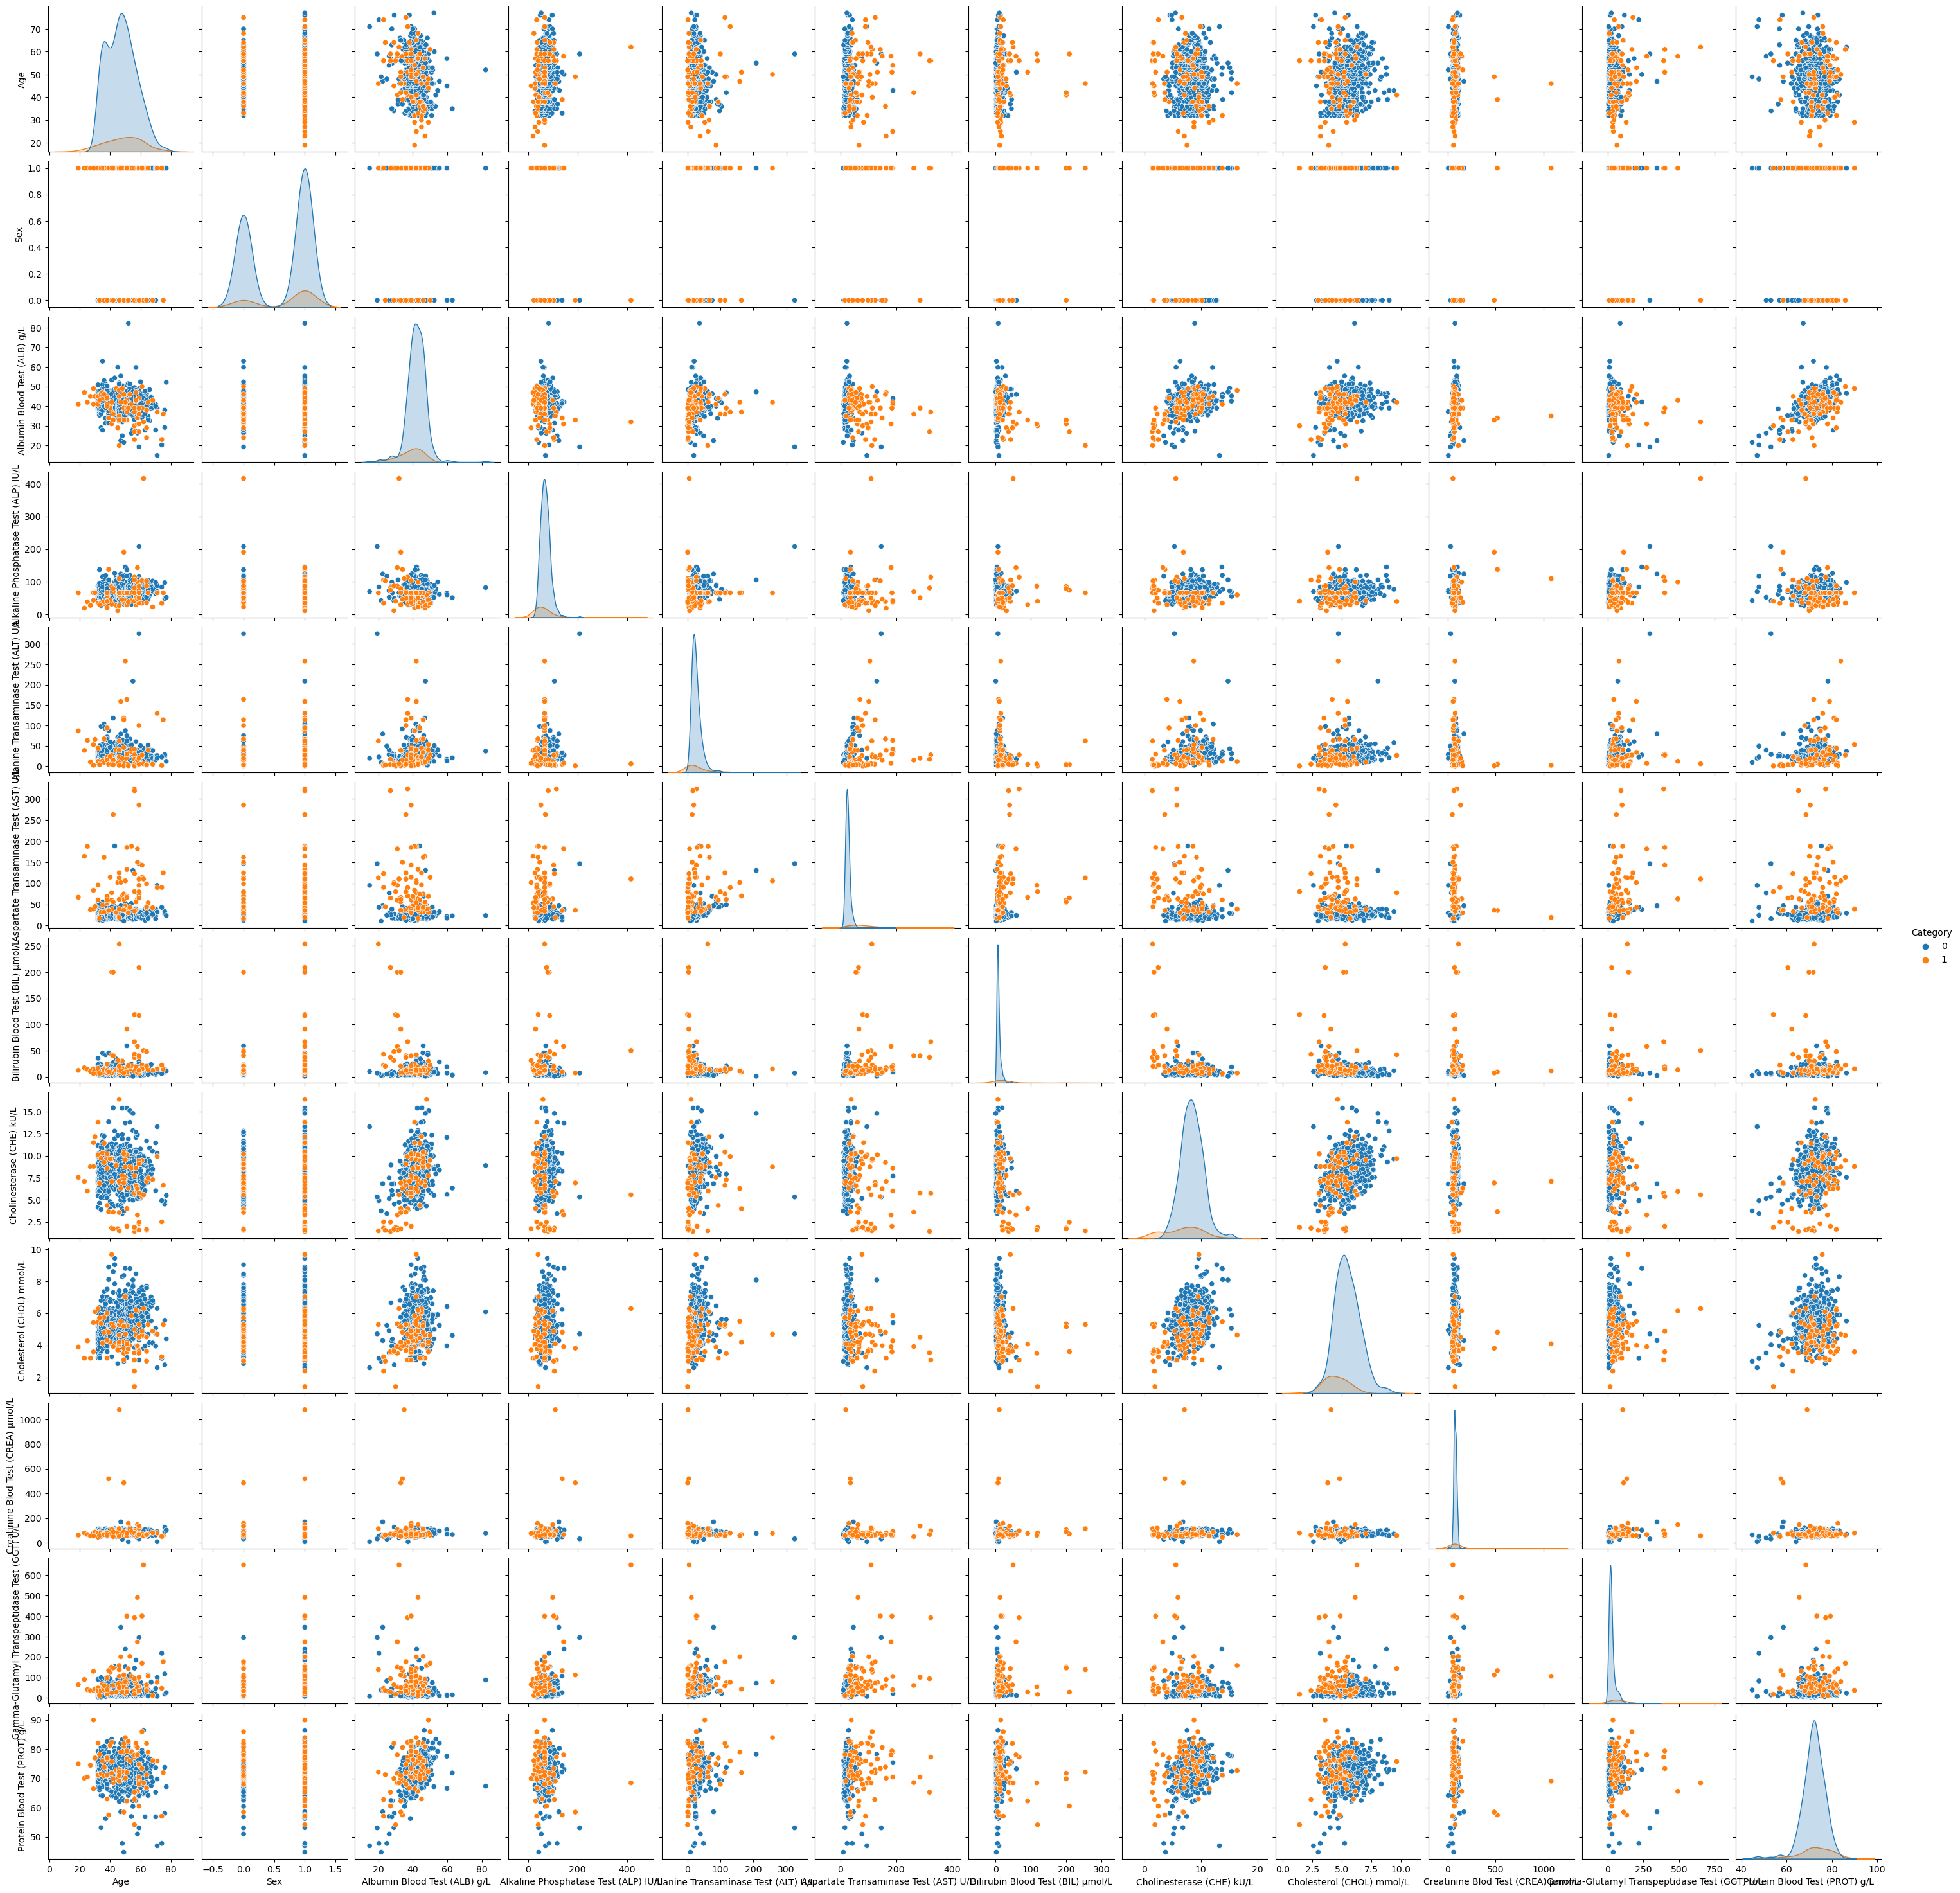

In [19]:
sns.pairplot(data, diag_kind="kde",hue="Category")

In [20]:
x = data.drop('Category' , axis = 1)
x.head()

,Age,Sex,Albumin Blood Test (ALB) g/L,Alkaline Phosphatase Test (ALP) IU/L,Alanine Transaminase Test (ALT) U/L,Aspartate Transaminase Test (AST) U/L,Bilirubin Blood Test (BIL) µmol/L,Cholinesterase (CHE) kU/L,Cholesterol (CHOL) mmol/L,Creatinine Blod Test (CREA) µmol/L,Gamma-Glutamyl Transpeptidase Test (GGT) U/L,Protein Blood Test (PROT) g/L
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [21]:
y = data['Category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42 , shuffle=True)

## ***Logistic Regression***

In [24]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_train_pred_lr = logistic_regression_model.predict(x_train)
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_lr * 100))

Accuracy on Training Set: 97.56


In [26]:
LR_Score = logistic_regression_model.score(x_test, y_test)
print("Accuracy By Logistic Regression Model:",LR_Score*100)

Accuracy By Logistic Regression Model: 89.43089430894308


Text(0.5, 1.0, 'Confusion Matrix For Logistic Regression')

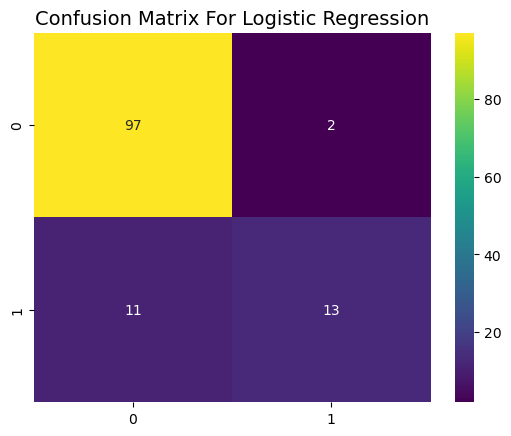

In [27]:
lr_y_pred = logistic_regression_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For Logistic Regression", fontsize=14)

## ***Hyperparameter Tuning On Logistic Regression Classifier***

In [28]:
lr = LogisticRegression()
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters:  {'C': 100, 'penalty': 'l2'}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.9613894         nan 0.9533086         nan 0.957349
        nan 0.95739023        nan 0.95938982]
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 96.14


In [30]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(x_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 88.6178861788618


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

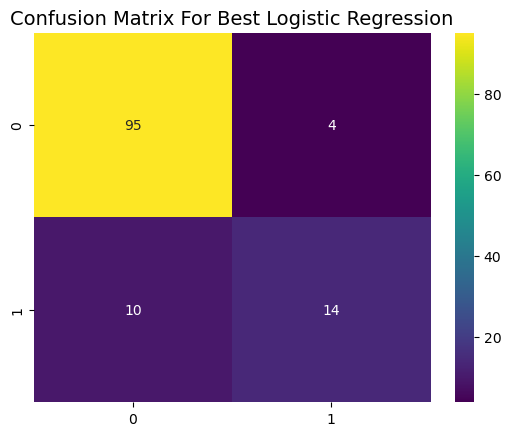

In [31]:
lr_grid_y_pred = Best_Logistic_Regression_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=14)

## ***RandomForest Classifier***

In [32]:
randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
y_train_pred_rf = randomforest_model.predict(x_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_rf * 100))

Accuracy on Training Set: 100.00


In [34]:
RF_Score = randomforest_model.score(x_test, y_test)
print("Accuracy By RandomForest Model:",RF_Score*100)

Accuracy By RandomForest Model: 93.4959349593496


Text(0.5, 1.0, 'Confusion Matrix For RandomForest')

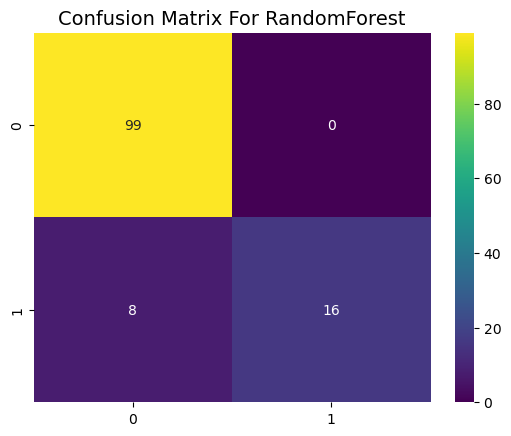

In [35]:
rf_y_pred = randomforest_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For RandomForest", fontsize=14)

## ***Hyperparameter Tuning On RandomForest Classifier***

In [37]:
rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [100, 200,300,1000],
    'max_depth': [40,80,90],
    'max_features' :[2,3],
    'min_samples_split': [8, 10,12],
    'min_samples_leaf': [ 3,4,5],
    'criterion' : ['gini', 'entropy'],
    'bootstrap': [True]
   
}

rf_grid_model = GridSearchCV(rf,param_grid=param_grid_rf , cv= 3,n_jobs=-1,verbose=2)
rf_grid_model.fit(x_train,y_train)
print("Best Parameters: ", rf_grid_model.best_params_)
Best_RandomForest_Model = rf_grid_model.best_estimator_



Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 300}


In [ ]:
print("Accuracy on Training Set: {:.2f}".format(rf_grid_model.best_score_ * 100))

Accuracy on Training Set: 97.15


In [ ]:
RF_Grid_Score = Best_RandomForest_Model.score(x_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Grid_Score*100)

Accuracy By Best RandomForest Model: 92.6829268292683


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

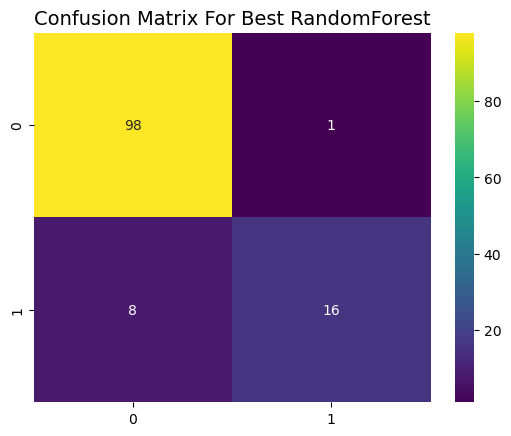

In [ ]:
rf_grid_y_pred = Best_RandomForest_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_grid_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

## ***Decision Tree***

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred_dt = decision_tree_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_dt* 100))

Accuracy on Training Set: 100.00


In [ ]:
DT_Score = decision_tree_model.score(x_test, y_test)
print("Accuracy By Decision Tree Model:",DT_Score*100)

Accuracy By Decision Tree Model: 92.6829268292683


Text(0.5, 1.0, 'Confusion Matrix For Decision Tree')

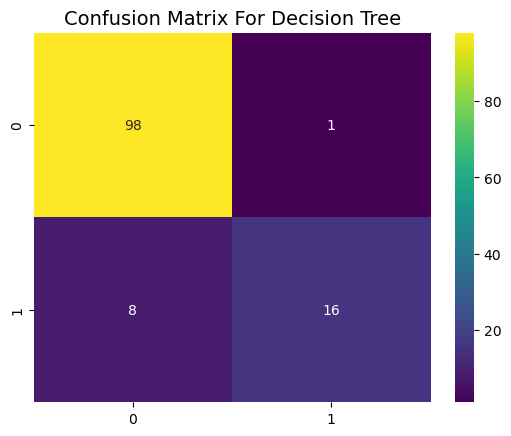

In [ ]:
dt_y_pred = decision_tree_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix For Decision Tree", fontsize=14)

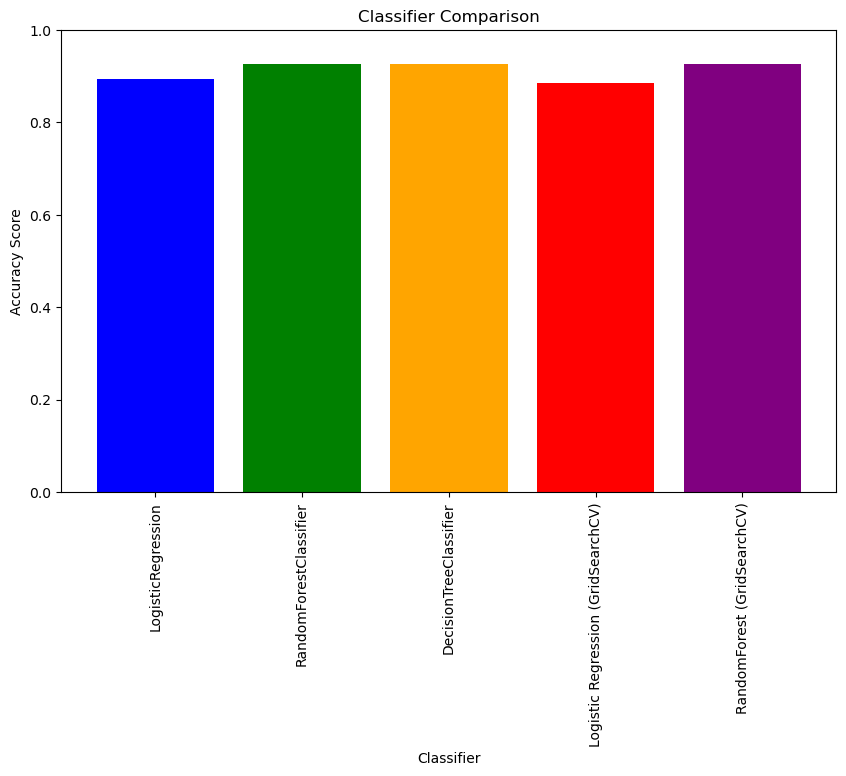

In [ ]:
x = ["LogisticRegression",  
     "RandomForestClassifier", 
     "DecisionTreeClassifier",
     "Logistic Regression (GridSearchCV)",
     "RandomForest (GridSearchCV)"
    ]

y = [LR_Score, 
     RF_Score,
     DT_Score,
     LR_Grid_Score,
     RF_Grid_Score]


plt.figure(figsize=(10, 6))
plt.bar(x, y, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Classifier Comparison')
plt.xlabel('Classifier')
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

## ***Save Model***

In [ ]:
import joblib
joblib.dump(Best_Logistic_Regression_Model, 'lr_best_model.pkl')
joblib.dump(Best_RandomForest_Model, 'rf_best_model.pkl')
joblib.dump(decision_tree_model, 'dt_model.pkl')
joblib.dump(logistic_regression_model, 'lr_model.pkl')
joblib.dump(randomforest_model, 'rf_model.pkl')


['rf_model.pkl']